<a href="https://colab.research.google.com/github/Tatynaae/-31github/blob/leetcode/master-class-%22lab_1_ml_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Intro to Pandas

In [ ]:
col_1 = [1, 2, 34, 5, 56, 7, 8, 45]
col_2 = [100, 101, 102, 103, 104, 105, 106, 107]
col_3 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
df = pd.DataFrame({'col_1': col_1, 'col_2': col_2, 'col_3': col_3})
df

,col_1,col_2,col_3
0,1,100,A
1,2,101,B
2,34,102,C
3,5,103,D
4,56,104,E
5,7,105,F
6,8,106,G
7,45,107,H


In [ ]:
df

,col_1,col_2,col_3
0,1,100,A
1,2,101,B
2,34,102,C
3,5,103,D
4,56,104,E
5,7,105,F
6,8,106,G
7,45,107,H


In [ ]:
df.col_1 + df.col_2

0    101
1    103
2    136
3    108
4    160
5    112
6    114
7    152
dtype: int64

In [ ]:
df.col_1.median()

7.5

In [ ]:
(170+160+2000+140)/4

617.5

# Part 1

### Regression

У нас история развития бизнеса относительно доходности.

In [ ]:
year = [2016, 2017, 2018, 2019, 2020]
profit = [2000, 2500, 3100, 3600, 4000]
df = pd.DataFrame({'year': year, 'profit': profit})
df

,year,profit
0,2016,2000
1,2017,2500
2,2018,3100
3,2019,3600
4,2020,4000


<Axes: xlabel='year', ylabel='profit'>

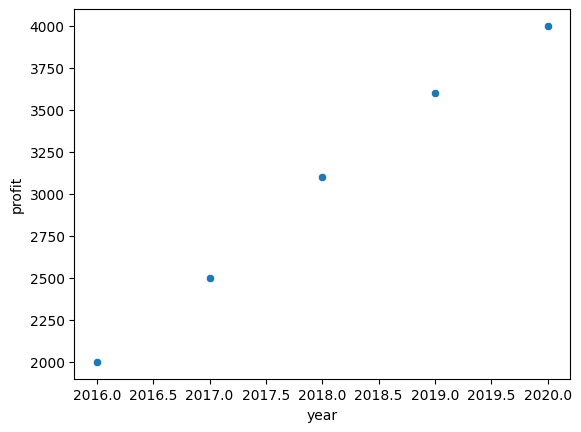

In [ ]:
sns.scatterplot(x=df.year, y=df.profit)

<Axes: xlabel='year', ylabel='profit'>

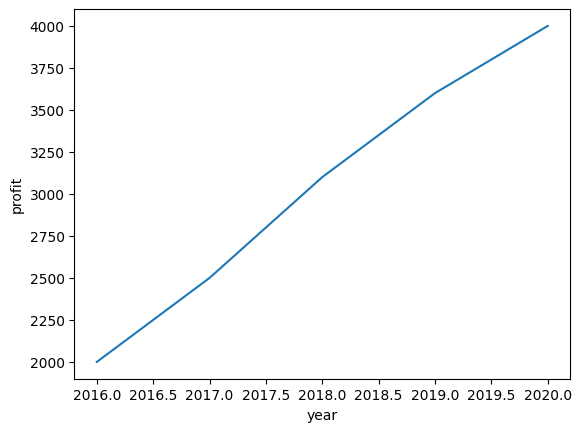

In [ ]:
sns.lineplot(x=df.year, y=df.profit)

Давайте предскажем доход бизнеса в 2023 году, если  будем считать данный тренд развития неизменным.

In [ ]:
degree = 1
coeff = np.polyfit(df.year, df.profit, degree)
coeff

array([ 5.10000e+02, -1.02614e+06])

Мы получили два числа, на базе которых мы можем написать линейную зависимость дохода от года в виде уравнения (формулы)

$profit = 510 * year - 1.03*10^6$



А вот и сами коэффициенты

In [ ]:
print('Slope: ', coeff[0])
print('intersept: ', coeff[1])

Slope:  509.9999999999752
intersept:  -1026139.9999999494


Теперь в полученную формулу подставим год и получим результат:

In [ ]:
profit_2023 = coeff[0]*2040 + coeff[1]

In [ ]:
print(f'В 2040 году доходность составит {round(profit_2023)} $')

В 2040 году доходность составит 14260 $


# Part 2

### Clastering

In [ ]:
arr = np.random.randn(60, 2)
arr[np.random.choice(arr.shape[0], size=30), :] += 5

In [ ]:
df = pd.DataFrame({'X': arr[:, 0], 'Y': arr[:, 1]})
df['class'] = np.nan

Мы сгенерили набор чисел и оформили его в виде пандас таблицы.

In [ ]:
df.head(10)

,X,Y,class
0,-0.040418,0.797224,NaN
1,6.717607,5.299588,NaN
2,4.308573,6.456155,NaN
3,0.869070,-0.877253,NaN
4,4.107629,4.802267,NaN
5,6.067182,7.188797,NaN
6,0.245692,0.677305,NaN
7,0.097916,0.832891,NaN
8,1.531598,-0.596414,NaN
9,3.100462,4.501801,NaN


<Axes: xlabel='X', ylabel='Y'>

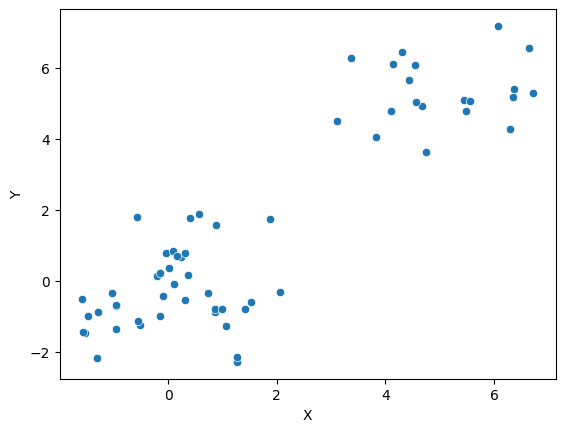

In [ ]:
sns.scatterplot(x= df.X, y = df.Y)

<Axes: xlabel='X', ylabel='Density'>

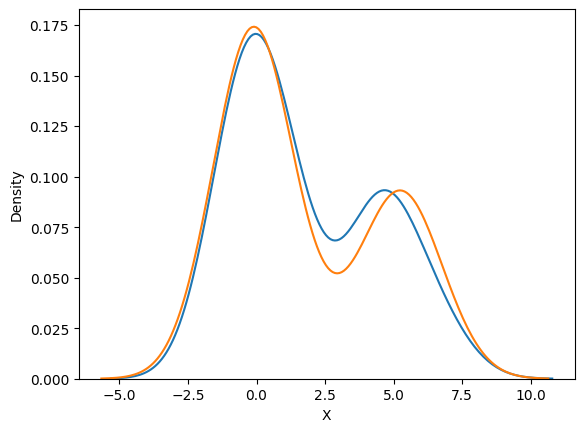

In [ ]:
sns.kdeplot(df.X)
sns.kdeplot(df.Y)

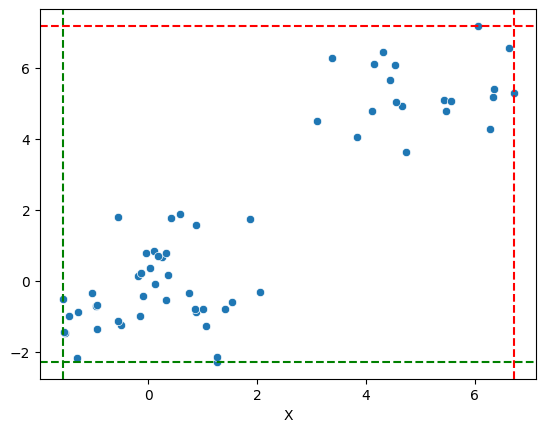

In [ ]:
sns.scatterplot(x= df.X, y = arr[:, 1])
plt.axvline(x=df.X.min(), color='g', linestyle='--')
plt.axvline(x=df.X.max(), color='r', linestyle='--')
plt.axhline(y=df.Y.min(), color='g', linestyle='--')
plt.axhline(y=df.Y.max(), color='r', linestyle='--')

Граница - это прямая, которая пройдет по диагонали

<Axes: xlabel='X'>

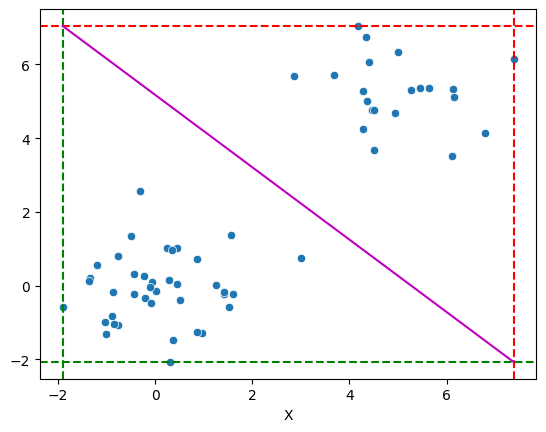

In [ ]:
sns.scatterplot(x= df.X, y = arr[:, 1])
plt.axvline(x=df.X.min(), color='g', linestyle='--')
plt.axvline(x=df.X.max(), color='r', linestyle='--')
plt.axhline(y=df.Y.min(), color='g', linestyle='--')
plt.axhline(y=df.Y.max(), color='r', linestyle='--')
sns.lineplot(x = [df.X.min(), df.X.max()], y = [df.Y.max(), df.Y.min()], color='m')

In [ ]:
x = [df.X.min(), df.X.max()]
y = [df.Y.max(), df.Y.min()]
degree = 1

coeff = np.polyfit(x, y, degree)
coeff

array([-1.14211529,  5.38494002])

Уравнение прямой имеет вид:

$y = coeff[0]x + coeff[1]$

Тогда кластер, который находится выше прямой будет соответствовать условию:

$y > coeff[0]x + coeff[1]$


In [ ]:
df['class'] = np.nan
df.loc[df.Y > coeff[0]*df.X + coeff[1], 'class'] = 'A'
df.loc[df.Y < coeff[0]*df.X + coeff[1], 'class'] = 'B'
df.head(8)

,X,Y,class
0,-0.040418,0.797224,B
1,6.717607,5.299588,A
2,4.308573,6.456155,A
3,0.869070,-0.877253,B
4,4.107629,4.802267,A
5,6.067182,7.188797,A
6,0.245692,0.677305,B
7,0.097916,0.832891,B


<Axes: xlabel='X', ylabel='Y'>

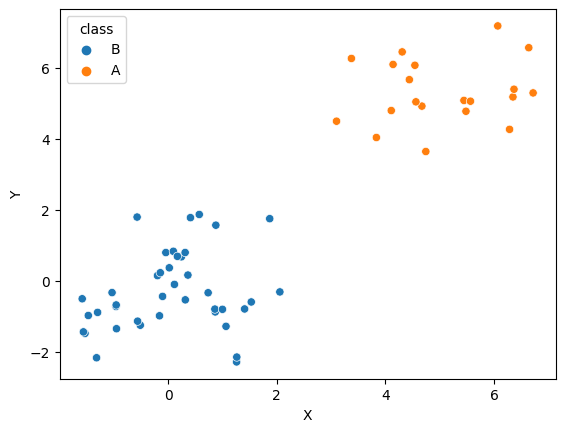

In [ ]:
sns.scatterplot(x='X', y='Y', data=df, hue='class')

# Part 3

## Self worf

Давайте попробуем разбить на виды цветок рода Ирис.

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df = df.loc[df.species!= 'virginica', ['sepal_length', 'sepal_width']]

In [ ]:
df['species']=np.nan

In [ ]:
df

,sepal_length,sepal_width,species
0,5.1,3.5,NaN
1,4.9,3.0,NaN
2,4.7,3.2,NaN
3,4.6,3.1,NaN
4,5.0,3.6,NaN
...,...,...,...
95,5.7,3.0,NaN
96,5.7,2.9,NaN
97,6.2,2.9,NaN
98,5.1,2.5,NaN


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

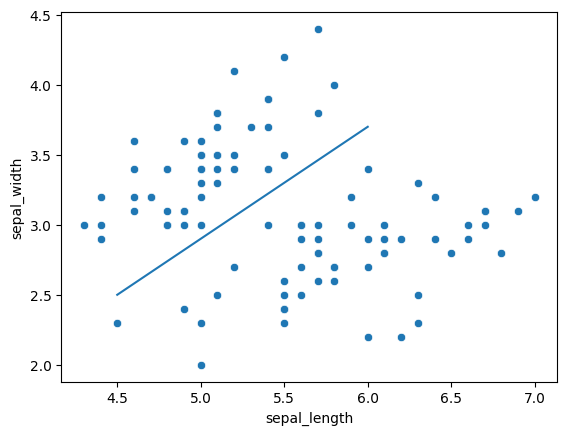

In [ ]:
sns.scatterplot(x=df.sepal_length, y = df.sepal_width)
sns.lineplot(x=[4.5, 6], y=[2.5, 3.7])

In [ ]:
# Your code
degree = 1
coeff = np.polyfit([4.5, 6], [2.5, 3.7], degree)
coeff

array([ 0.8, -1.1])

In [ ]:
df.loc[df.sepal_width > coeff[0]*df.sepal_length + coeff[1], 'species'] = 'A'
df.loc[df.sepal_width < coeff[0]*df.sepal_length + coeff[1], 'species'] = 'B'

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

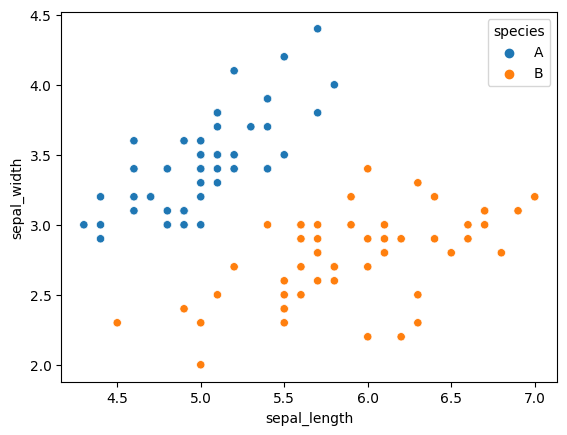

In [ ]:
sns.scatterplot(x=df.sepal_length, y = df.sepal_width, hue=df.species)

In [ ]:
df

,sepal_length,sepal_width,species
0,5.1,3.5,A
1,4.9,3.0,A
2,4.7,3.2,A
3,4.6,3.1,A
4,5.0,3.6,A
...,...,...,...
95,5.7,3.0,B
96,5.7,2.9,B
97,6.2,2.9,B
98,5.1,2.5,B


# K-means

Это уже готовый алгоритм кластеризации.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['sepal_length', 'sepal_width']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int32)

In [ ]:
df['k_means_clast'] = labels

In [ ]:
df

,sepal_length,sepal_width,species,k_means_clast
0,5.1,3.5,A,0
1,4.9,3.0,A,0
2,4.7,3.2,A,0
3,4.6,3.1,A,0
4,5.0,3.6,A,0
...,...,...,...,...
95,5.7,3.0,B,1
96,5.7,2.9,B,1
97,6.2,2.9,B,1
98,5.1,2.5,B,0


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

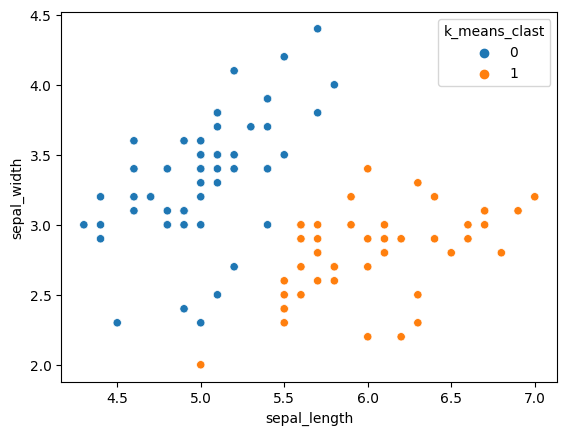

In [ ]:
sns.scatterplot(x=df.sepal_length, y = df.sepal_width, hue=df.k_means_clast)